In [11]:
source("affy_utils.R")

Loading required package: mgcv
Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:Biostrings’:

    collapse

The following object is masked from ‘package:IRanges’:

    collapse

This is mgcv 1.8-11. For overview type 'help("mgcv-package")'.
Loading required package: genefilter

Attaching package: ‘genefilter’

The following object is masked from ‘package:base’:

    anyNA



In [2]:
gse_names <- c("GSE60596")  #"GSE68646","GSE50789","GSE37209","GSE16790","GSE51885","GSE34773","GSE14202")
data_dir <- paste(getwd(), "data", sep="/")

In [3]:
#get raw data
get_raw(gse_names, data_dir)

[[1]]
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483027_Mouse_EF_CD-1.CEL.gz 
                                                                                            11118245 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483028_Mouse_EF_CD-2.CEL.gz 
                                                                                            11124001 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483029_Mouse_EF_CD-3.CEL.gz 
                                                                                            11128249 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483030_Mouse_EF_CR55-1.CEL.gz 
                                                                                            11119305 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483031_Mouse_EF_CR55-2.CEL.gz 
                                                                                            11117817 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483032_Mouse_EF_CR55-3.CEL.gz 
                                                                                            11134701 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483033_Mouse_EF_CR70-1.CEL.gz 
                                                                                            11123421 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483034_Mouse_EF_CR70-2.CEL.gz 
                                                                                            11129797 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483035_Mouse_EF_CR70-3.CEL.gz 
                                                                                            11120861 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483036_Mouse_EF_CR85-1.CEL.gz 
                                                                                            11121325 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483037_Mouse_EF_CR85-2.CEL.gz 
                                                                                            11124189 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483038_Mouse_EF_CR85-3.CEL.gz 
                                                                                            11133609

In [4]:
#load esets
esets <- load_eset(gse_names, data_dir)

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE60nnn/GSE60596/matrix/
Found 1 file(s)
GSE60596_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSE60596_series_matrix.txt.gz
Using locally cached version of GPL6246 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GPL6246.soft 
Loading required package: pd.mogene.1.0.st.v1
Loading required package: RSQLite
Loading required package: DBI
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483027_Mouse_EF_CD-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483028_Mouse_EF_CD-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483029_Mouse_EF_CD-3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483030_Mouse_EF_CR55-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483031_Mouse_EF_CR55-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483032_Mouse_EF_CR55-3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483033_Mouse_EF_CR70-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483034_Mouse_EF_CR70-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483035_Mouse_EF_CR70-3.CEL
Reading

Number of significant surrogate variables is:  1 
Iteration (out of 5 ):1  2  3  4  5             AL CR55 CR70 CR85 block_1level_1 block_1level_2         SV1
GSM1483027  1    0    0    0              0              0 -0.21393804
GSM1483028  1    0    0    0              1              0 -0.19293089
GSM1483029  1    0    0    0              0              1 -0.17707720
GSM1483030  0    1    0    0              0              0 -0.16418460
GSM1483031  0    1    0    0              1              0  0.24731621
GSM1483032  0    1    0    0              0              1 -0.13462440
GSM1483033  0    0    1    0              0              0  0.05891086
GSM1483034  0    0    1    0              1              0 -0.15107179
GSM1483035  0    0    1    0              0              1  0.47187532
GSM1483036  0    0    0    1              0              0 -0.21181087
GSM1483037  0    0    0    1              1              0  0.66752352
GSM1483038  0    0    0    1              0              1 -0

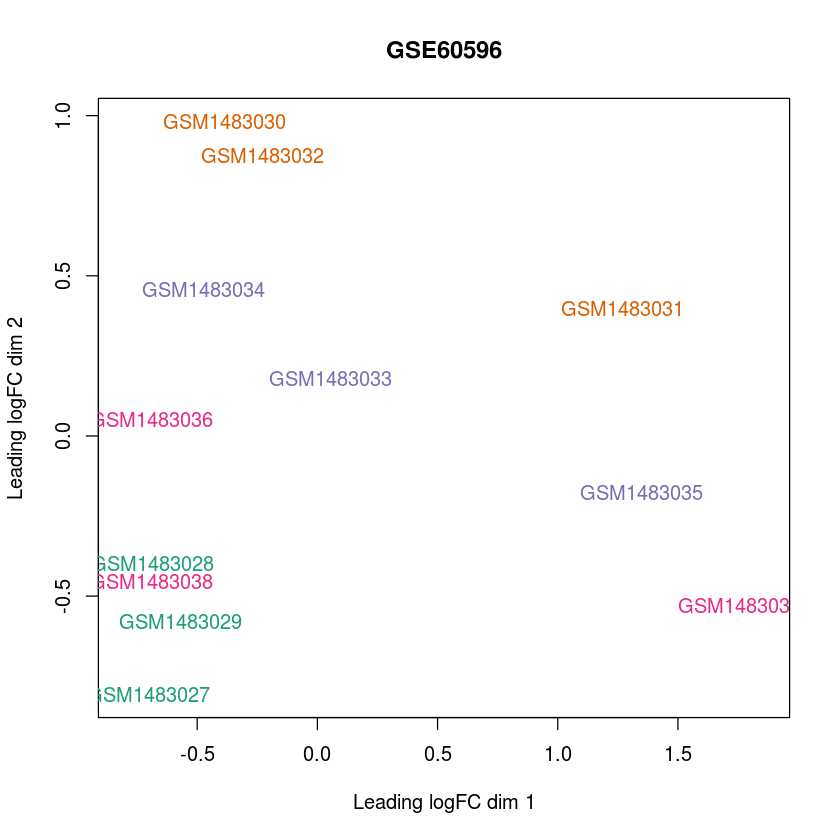

In [12]:
#differential expression
top_tables <- diff_expr(esets)

In [17]:
dim(top_tables[[1]])

[1] 598   6

In [37]:
#save top_tables
saveRDS(top_tables, file = paste(data_dir, "short_young_affy.rds", sep="/"))

In [35]:
for (i in seq_along(top_tables)){
    print (names(top_tables[i]))
    for (j in seq_along(top_tables[[i]])) {
        print (names(top_tables[[i]])[j])
        print (dim(top_tables[[i]][[j]]))
    }
}

[1] "GSE60596"
[1] "CR55-AL"
[1] 2829    6
[1] "CR70-AL"
[1] 418   6
[1] "CR85-AL"
[1] 0 0
[1] "GSE68646"
[1] "CR-AL"
[1] 9463    6
[1] "GSE50789"
[1] "CR_129-AL_129"
[1] 6445    6
[1] "CR_CBA-AL_CBA"
[1] 23052     6
[1] "GSE37209"
[1] "CR-AL"
[1] 0 0
[1] "GSE16790"
[1] "CR_obob-AL_obob"
[1] 492   6
[1] "GSE51885"
[1] "CR-AL"
[1] 3398    6
[1] "GSE34773"
[1] "CR-AL"
[1] 1856    6
[1] "GSE14202"
[1] "CR-AL"
[1] 1805    6
[1] "CR_EX-AL"
[1] 716   6
